<a href="https://colab.research.google.com/github/amirreza-safari/YOLOv8-DeepSORT-Object-Tracking/blob/main/stabilized_analyze_V8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from IPython.display import Image
!git clone https://github.com/MuhammadMoinFaisal/YOLOv8-DeepSORT-Object-Tracking.git
!pwd
%cd /content/YOLOv8-DeepSORT-Object-Tracking
!pip install -e '.[dev]'
%cd /content/YOLOv8-DeepSORT-Object-Tracking/ultralytics/yolo/v8/detect
!gdown "https://drive.google.com/uc?id=11ZSZcG-bcbueXZC3rN08CM0qqX3eiHxf&confirm=t"
!unzip 'deep_sort_pytorch.zip'
!gdown "https://drive.google.com/uc?id=1VBAZtJ5uJMEsnyya_d0yMP6efBRQ8IX-&confirm=t"
!pwd

Cloning into 'YOLOv8-DeepSORT-Object-Tracking'...
remote: Enumerating objects: 403, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 403 (delta 21), reused 19 (delta 19), pack-reused 370
Receiving objects: 100% (403/403), 77.99 MiB | 29.45 MiB/s, done.
Resolving deltas: 100% (206/206), done.
/content
/content/YOLOv8-DeepSORT-Object-Tracking
Obtaining file:///content/YOLOv8-DeepSORT-Object-Tracking
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.5/227.5 kB 27.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 83.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 92.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.1 MB/s eta 0:00:00
     ━

/content/YOLOv8-DeepSORT-Object-Tracking/ultralytics/yolo/v8/detect
Downloading...
From: https://drive.google.com/uc?id=11ZSZcG-bcbueXZC3rN08CM0qqX3eiHxf&confirm=t
To: /content/YOLOv8-DeepSORT-Object-Tracking/ultralytics/yolo/v8/detect/deep_sort_pytorch.zip
100% 43.1M/43.1M [00:00<00:00, 239MB/s]
Archive:  deep_sort_pytorch.zip
  inflating: deep_sort_pytorch/.gitignore  
   creating: deep_sort_pytorch/configs/
  inflating: deep_sort_pytorch/configs/deep_sort.yaml  
   creating: deep_sort_pytorch/deep_sort/
  inflating: deep_sort_pytorch/deep_sort/__init__.py  
   creating: deep_sort_pytorch/deep_sort/__pycache__/
  inflating: deep_sort_pytorch/deep_sort/__pycache__/__init__.cpython-310.pyc  
  inflating: deep_sort_pytorch/deep_sort/__pycache__/__init__.cpython-37.pyc  
  inflating: deep_sort_pytorch/deep_sort/__pycache__/__init__.cpython-38.pyc  
  inflating: deep_sort_pytorch/deep_sort/__pycache__/deep_sort.cpython-310.pyc  
  inflating: deep_sort_pytorch/deep_sort/__pycache__/deep_so

In [3]:
input_video_path = '/content/drive/MyDrive/stabilized3.mov'

In [4]:
import cv2

# Open the video file
cap = cv2.VideoCapture(input_video_path)

# Move to the end of the video to get the duration
cap.set(cv2.CAP_PROP_POS_FRAMES, cap.get(cv2.CAP_PROP_FRAME_COUNT) - 1)

# Read a frame to get the duration correctly
ret, frame = cap.read()

# Check if the frame was read successfully
if not ret:
    print("Error reading the last frame")

# Get the frame rate of the video
fps = cap.get(cv2.CAP_PROP_FPS)

# Get the duration of the video
video_duration = cap.get(cv2.CAP_PROP_POS_MSEC) / 1000.0

# Get the resolution of the video
frame_width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
frame_height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
resolution = (int(frame_width), int(frame_height))

# Get the total number of frames in the video
num_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

# Print the extracted information
print("Video duration: {:.2f} seconds".format(video_duration))
print("Frame rate: {:.2f} fps".format(fps))
print("Resolution: {}x{}".format(resolution[0], resolution[1]))
print("Number of frames: {}".format(num_frames))

# Release the video file
cap.release()

Video duration: 732.67 seconds
Frame rate: 24.00 fps
Resolution: 3840x2160
Number of frames: 17585


#**RUNING THE ALGORITHM**

In [5]:
!python stabilized_analysis_model.py model='best.pt' source={input_video_path}

Streaming output truncated to the last 5000 lines.
video 1/1 (12588/17585) /content/drive/MyDrive/stabilized3.mov: 384x640 1 car, 40.9ms
video 1/1 (12589/17585) /content/drive/MyDrive/stabilized3.mov: 384x640 1 car, 40.9ms
video 1/1 (12590/17585) /content/drive/MyDrive/stabilized3.mov: 384x640 1 car, 40.9ms
video 1/1 (12591/17585) /content/drive/MyDrive/stabilized3.mov: 384x640 1 car, 46.6ms
video 1/1 (12592/17585) /content/drive/MyDrive/stabilized3.mov: 384x640 1 car, 40.9ms
video 1/1 (12593/17585) /content/drive/MyDrive/stabilized3.mov: 384x640 1 car, 40.9ms
video 1/1 (12594/17585) /content/drive/MyDrive/stabilized3.mov: 384x640 1 car, 40.9ms
video 1/1 (12595/17585) /content/drive/MyDrive/stabilized3.mov: 384x640 1 car, 40.9ms
video 1/1 (12596/17585) /content/drive/MyDrive/stabilized3.mov: 384x640 1 car, 40.9ms
video 1/1 (12597/17585) /content/drive/MyDrive/stabilized3.mov: 384x640 1 car, 40.8ms
video 1/1 (12598/17585) /content/drive/MyDrive/stabilized3.mov: 384x640 1 car, 42.1ms
vid

**IMPORT FILE TO GOOGLE DRIVE**

In [6]:
import shutil

# Replace 'video_file_name.mp4' with your video file's actual name
source_file_path = '/content/YOLOv8-DeepSORT-Object-Tracking/runs/detect/train/stabilized3.mp4'

# Replace 'path_in_drive' with the desired path in your Google Drive
destination_drive_path = '/content/drive/MyDrive/result'

# Move the file from Colab to Google Drive
shutil.move(source_file_path, destination_drive_path)

'/content/drive/MyDrive/result/stabilized3.mp4'

**SORTING POSITION FILE**

In [7]:
def sort_file_by_id(file_path):
    with open(file_path, 'r') as f:
        lines = f.readlines()

    # Sort the lines based on the ID (column 4) and then the frame number (column 1)
    sorted_lines = sorted(lines, key=lambda line: (int(line.split(',')[3]), int(line.split(',')[0])))

    # Write the sorted lines back to the file
    with open(file_path, 'w') as f:
        f.writelines(sorted_lines)

# Usage
sort_file_by_id('positions.txt')

In [8]:
!pip install PyWavelets


In [9]:
%matplotlib inline
import matplotlib.pyplot as plt


<ipython-input-24-59a325b1109a>:59: RankWarning: Polyfit may be poorly conditioned
  line_speed = calculate_speed(x_filtered, time_filtered)
<ipython-input-24-59a325b1109a>:59: RankWarning: Polyfit may be poorly conditioned
  line_speed = calculate_speed(x_filtered, time_filtered)
<ipython-input-24-59a325b1109a>:59: RankWarning: Polyfit may be poorly conditioned
  line_speed = calculate_speed(x_filtered, time_filtered)
<ipython-input-24-59a325b1109a>:77: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


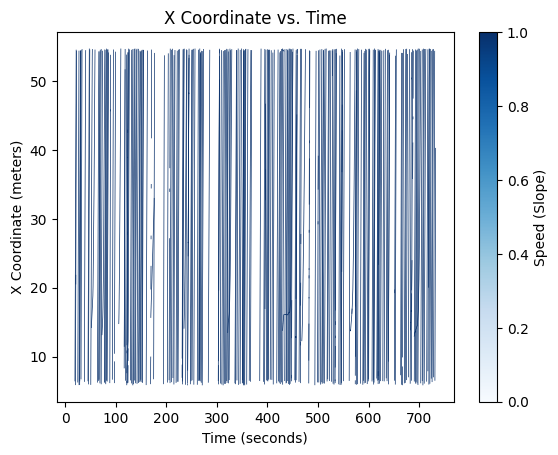

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

def pixel_to_meter(x_pixel):
    # Conversion factor from pixels to meters
    pixel_to_meter_factor = 58 / frame_width
    return 58 - x_pixel * pixel_to_meter_factor

def frame_to_time(frame, frame_rate):
    return frame / frame_rate

def calculate_speed(x_data, time_data):
    # Calculate the speed (slope) of the line using linear regression
    slope, _ = np.polyfit(time_data, x_data, deg=1)
    return slope

def draw_graphs(file_path, frame_rate=fps):
    data = {}  # Dictionary to store data for each ID

    # Read the file and store data for each ID
    with open(file_path, 'r') as f:
        lines = f.readlines()

    for line in lines:
        frame, x_pos, _, id = line.split(',')
        id = int(id)
        frame = int(frame)
        x_pos = float(x_pos)

        if id not in data:
            data[id] = {'x': [], 'frame': []}

        data[id]['x'].append(x_pos)
        data[id]['frame'].append(frame)

    # Combine all data for calculating slopes
    all_x = [x for values in data.values() for x in values['x']]
    all_frame = [frame for values in data.values() for frame in values['frame']]
    all_time = [frame_to_time(frame, frame_rate) for frame in all_frame]

    # Calculate the slope (speed) of the line for all data
    overall_speed = calculate_speed(all_x, all_time)

    # Create a colormap for the speeds (slopes)
    cmap = ListedColormap(plt.cm.Blues(np.linspace(0, 1, 256)))  # Blue colormap
    num_lines = len(data)

    # Plot graphs for each ID with colors based on the speed (slope)
    for idx, (id, values) in enumerate(data.items()):
        x_filtered = [x for x, frame in zip(values['x'], values['frame']) if 220 <= x <= 3450]
        frame_filtered = [frame for x, frame in zip(values['x'], values['frame']) if 220 <= x <= 3450]
        time_filtered = [frame_to_time(frame, frame_rate) for frame in frame_filtered]

        if not x_filtered:  # Skip if x_filtered is empty
            continue

        # Calculate the speed (slope) of the line for each ID
        line_speed = calculate_speed(x_filtered, time_filtered)

        # Choose a color based on the speed difference from the overall speed
        speed_diff = abs(line_speed - overall_speed)
        color = cmap(speed_diff / max(speed_diff, 1e-5))  # Avoid division by zero

        # Convert x coordinates from pixels to meters
        x_meters = [pixel_to_meter(x) for x in x_filtered]

        plt.plot(time_filtered, x_meters, color=color, lw=0.5, label=None)  # Set line width to 1.0

    plt.xlabel('Time (seconds)')
    plt.ylabel('X Coordinate (meters)')
    plt.title('X Coordinate vs. Time')

    # Add colorbar with correct label for speed
    sm = plt.cm.ScalarMappable(cmap=cmap)
    sm.set_array([])  # Dummy array for colorbar
    cbar = plt.colorbar(sm)
    cbar.set_label('Speed (Slope)')

    plt.show()

# Usage
draw_graphs('positions.txt', frame_rate=fps)

<ipython-input-25-6512e3fbc2ae>:72: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


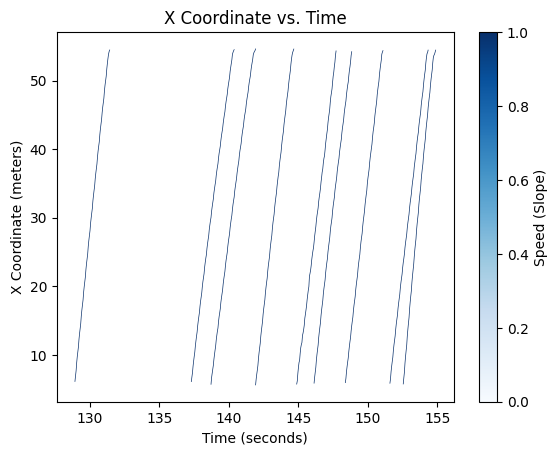

In [25]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

def pixel_to_meter(x_pixel, frame_width):
    pixel_to_meter_factor = 58 / frame_width
    return 58 - x_pixel * pixel_to_meter_factor

def frame_to_time(frame, frame_rate):
    return frame / frame_rate

def calculate_speed(x_data, time_data):
    slope, _ = np.polyfit(time_data, x_data, deg=1)
    return slope

def draw_graphs(file_path, selected_ids=None, frame_rate=None):
    data = {}

    with open(file_path, 'r') as f:
        lines = f.readlines()

    for line in lines:
        frame, x_pos, _, id = line.split(',')
        id = int(id)
        frame = int(frame)
        x_pos = float(x_pos)

        if selected_ids is not None and id not in selected_ids:
            continue

        if id not in data:
            data[id] = {'x': [], 'frame': []}

        data[id]['x'].append(x_pos)
        data[id]['frame'].append(frame)

    all_x = [x for values in data.values() for x in values['x']]
    all_frame = [frame for values in data.values() for frame in values['frame']]
    all_time = [frame_to_time(frame, frame_rate) for frame in all_frame]

    overall_speed = calculate_speed(all_x, all_time)

    cmap = ListedColormap(plt.cm.Blues(np.linspace(0, 1, 256)))
    num_lines = len(data)

    for idx, (id, values) in enumerate(data.items()):
        if selected_ids is not None and id not in selected_ids:
            continue

        x_filtered = [x for x, frame in zip(values['x'], values['frame']) if 220 <= x <= 3450]
        frame_filtered = [frame for x, frame in zip(values['x'], values['frame']) if 220 <= x <= 3450]
        time_filtered = [frame_to_time(frame, frame_rate) for frame in frame_filtered]

        if not x_filtered:
            continue

        line_speed = calculate_speed(x_filtered, time_filtered)

        speed_diff = abs(line_speed - overall_speed)
        color = cmap(speed_diff / max(speed_diff, 1e-5))

        x_meters = [pixel_to_meter(x, max(all_x)) for x in x_filtered]

        plt.plot(time_filtered, x_meters, color=color, lw=0.5, label=f'ID: {id}')

    plt.xlabel('Time (seconds)')
    plt.ylabel('X Coordinate (meters)')
    plt.title('X Coordinate vs. Time')

    sm = plt.cm.ScalarMappable(cmap=cmap)
    sm.set_array([])
    cbar = plt.colorbar(sm)
    cbar.set_label('Speed (Slope)')

    plt.show()

# Usage with selected IDs
draw_graphs('positions.txt', selected_ids=[131, 138, 136, 148, 150, 154, 153,164,163], frame_rate=fps)


<ipython-input-26-e06a772e53da>:72: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


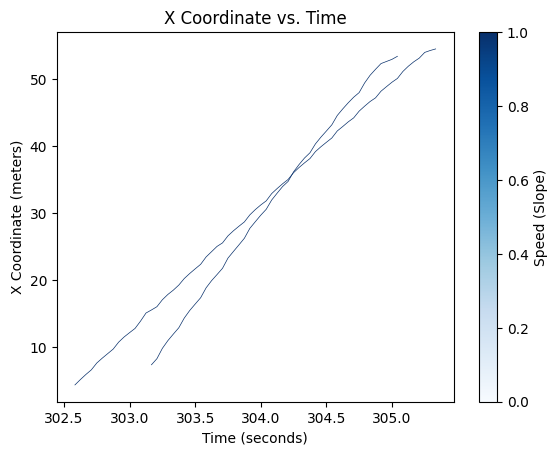

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

def pixel_to_meter(x_pixel, frame_width):
    pixel_to_meter_factor = 58 / frame_width
    return 58 - x_pixel * pixel_to_meter_factor

def frame_to_time(frame, frame_rate):
    return frame / frame_rate

def calculate_speed(x_data, time_data):
    slope, _ = np.polyfit(time_data, x_data, deg=1)
    return slope

def draw_graphs(file_path, selected_ids=None, frame_rate=None):
    data = {}

    with open(file_path, 'r') as f:
        lines = f.readlines()

    for line in lines:
        frame, x_pos, _, id = line.split(',')
        id = int(id)
        frame = int(frame)
        x_pos = float(x_pos)

        if selected_ids is not None and id not in selected_ids:
            continue

        if id not in data:
            data[id] = {'x': [], 'frame': []}

        data[id]['x'].append(x_pos)
        data[id]['frame'].append(frame)

    all_x = [x for values in data.values() for x in values['x']]
    all_frame = [frame for values in data.values() for frame in values['frame']]
    all_time = [frame_to_time(frame, frame_rate) for frame in all_frame]

    overall_speed = calculate_speed(all_x, all_time)

    cmap = ListedColormap(plt.cm.Blues(np.linspace(0, 1, 256)))
    num_lines = len(data)

    for idx, (id, values) in enumerate(data.items()):
        if selected_ids is not None and id not in selected_ids:
            continue

        x_filtered = [x for x, frame in zip(values['x'], values['frame']) if 220 <= x <= 3450]
        frame_filtered = [frame for x, frame in zip(values['x'], values['frame']) if 220 <= x <= 3450]
        time_filtered = [frame_to_time(frame, frame_rate) for frame in frame_filtered]

        if not x_filtered:
            continue

        line_speed = calculate_speed(x_filtered, time_filtered)

        speed_diff = abs(line_speed - overall_speed)
        color = cmap(speed_diff / max(speed_diff, 1e-5))

        x_meters = [pixel_to_meter(x, max(all_x)) for x in x_filtered]

        plt.plot(time_filtered, x_meters, color=color, lw=0.5, label=f'ID: {id}')

    plt.xlabel('Time (seconds)')
    plt.ylabel('X Coordinate (meters)')
    plt.title('X Coordinate vs. Time')

    sm = plt.cm.ScalarMappable(cmap=cmap)
    sm.set_array([])
    cbar = plt.colorbar(sm)
    cbar.set_label('Speed (Slope)')

    plt.show()

# Usage with selected IDs
draw_graphs('positions.txt', selected_ids=[268,272], frame_rate=fps)


<ipython-input-27-ca537ebd5fe1>:72: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


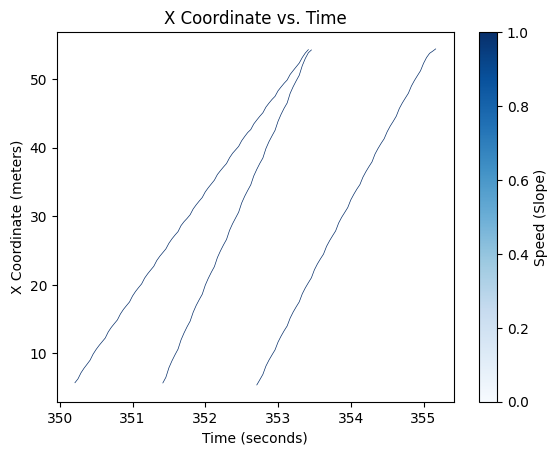

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

def pixel_to_meter(x_pixel, frame_width):
    pixel_to_meter_factor = 58 / frame_width
    return 58 - x_pixel * pixel_to_meter_factor

def frame_to_time(frame, frame_rate):
    return frame / frame_rate

def calculate_speed(x_data, time_data):
    slope, _ = np.polyfit(time_data, x_data, deg=1)
    return slope

def draw_graphs(file_path, selected_ids=None, frame_rate=None):
    data = {}

    with open(file_path, 'r') as f:
        lines = f.readlines()

    for line in lines:
        frame, x_pos, _, id = line.split(',')
        id = int(id)
        frame = int(frame)
        x_pos = float(x_pos)

        if selected_ids is not None and id not in selected_ids:
            continue

        if id not in data:
            data[id] = {'x': [], 'frame': []}

        data[id]['x'].append(x_pos)
        data[id]['frame'].append(frame)

    all_x = [x for values in data.values() for x in values['x']]
    all_frame = [frame for values in data.values() for frame in values['frame']]
    all_time = [frame_to_time(frame, frame_rate) for frame in all_frame]

    overall_speed = calculate_speed(all_x, all_time)

    cmap = ListedColormap(plt.cm.Blues(np.linspace(0, 1, 256)))
    num_lines = len(data)

    for idx, (id, values) in enumerate(data.items()):
        if selected_ids is not None and id not in selected_ids:
            continue

        x_filtered = [x for x, frame in zip(values['x'], values['frame']) if 220 <= x <= 3450]
        frame_filtered = [frame for x, frame in zip(values['x'], values['frame']) if 220 <= x <= 3450]
        time_filtered = [frame_to_time(frame, frame_rate) for frame in frame_filtered]

        if not x_filtered:
            continue

        line_speed = calculate_speed(x_filtered, time_filtered)

        speed_diff = abs(line_speed - overall_speed)
        color = cmap(speed_diff / max(speed_diff, 1e-5))

        x_meters = [pixel_to_meter(x, max(all_x)) for x in x_filtered]

        plt.plot(time_filtered, x_meters, color=color, lw=0.5, label=f'ID: {id}')

    plt.xlabel('Time (seconds)')
    plt.ylabel('X Coordinate (meters)')
    plt.title('X Coordinate vs. Time')

    sm = plt.cm.ScalarMappable(cmap=cmap)
    sm.set_array([])
    cbar = plt.colorbar(sm)
    cbar.set_label('Speed (Slope)')

    plt.show()

# Usage with selected IDs
draw_graphs('positions.txt', selected_ids=[326,327,325], frame_rate=fps)


<ipython-input-28-a810b3d71f81>:72: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


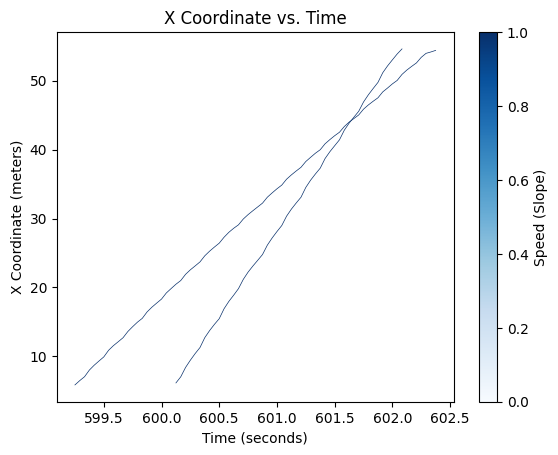

In [28]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

def pixel_to_meter(x_pixel, frame_width):
    pixel_to_meter_factor = 58 / frame_width
    return 58 - x_pixel * pixel_to_meter_factor

def frame_to_time(frame, frame_rate):
    return frame / frame_rate

def calculate_speed(x_data, time_data):
    slope, _ = np.polyfit(time_data, x_data, deg=1)
    return slope

def draw_graphs(file_path, selected_ids=None, frame_rate=None):
    data = {}

    with open(file_path, 'r') as f:
        lines = f.readlines()

    for line in lines:
        frame, x_pos, _, id = line.split(',')
        id = int(id)
        frame = int(frame)
        x_pos = float(x_pos)

        if selected_ids is not None and id not in selected_ids:
            continue

        if id not in data:
            data[id] = {'x': [], 'frame': []}

        data[id]['x'].append(x_pos)
        data[id]['frame'].append(frame)

    all_x = [x for values in data.values() for x in values['x']]
    all_frame = [frame for values in data.values() for frame in values['frame']]
    all_time = [frame_to_time(frame, frame_rate) for frame in all_frame]

    overall_speed = calculate_speed(all_x, all_time)

    cmap = ListedColormap(plt.cm.Blues(np.linspace(0, 1, 256)))
    num_lines = len(data)

    for idx, (id, values) in enumerate(data.items()):
        if selected_ids is not None and id not in selected_ids:
            continue

        x_filtered = [x for x, frame in zip(values['x'], values['frame']) if 220 <= x <= 3450]
        frame_filtered = [frame for x, frame in zip(values['x'], values['frame']) if 220 <= x <= 3450]
        time_filtered = [frame_to_time(frame, frame_rate) for frame in frame_filtered]

        if not x_filtered:
            continue

        line_speed = calculate_speed(x_filtered, time_filtered)

        speed_diff = abs(line_speed - overall_speed)
        color = cmap(speed_diff / max(speed_diff, 1e-5))

        x_meters = [pixel_to_meter(x, max(all_x)) for x in x_filtered]

        plt.plot(time_filtered, x_meters, color=color, lw=0.5, label=f'ID: {id}')

    plt.xlabel('Time (seconds)')
    plt.ylabel('X Coordinate (meters)')
    plt.title('X Coordinate vs. Time')

    sm = plt.cm.ScalarMappable(cmap=cmap)
    sm.set_array([])
    cbar = plt.colorbar(sm)
    cbar.set_label('Speed (Slope)')

    plt.show()

# Usage with selected IDs
draw_graphs('positions.txt', selected_ids=[628,627], frame_rate=fps)


<ipython-input-30-3065d631c61c>:72: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


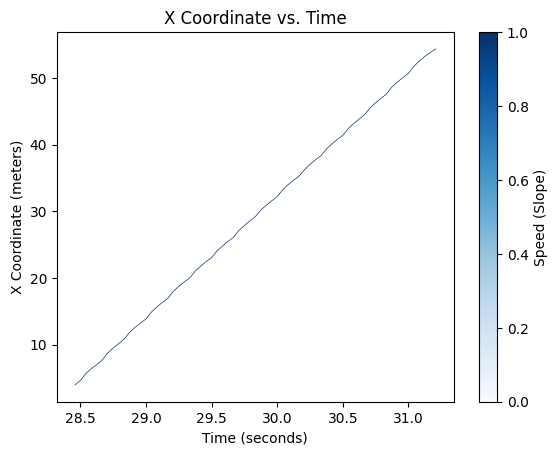

In [30]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

def pixel_to_meter(x_pixel, frame_width):
    pixel_to_meter_factor = 58 / frame_width
    return 58 - x_pixel * pixel_to_meter_factor

def frame_to_time(frame, frame_rate):
    return frame / frame_rate

def calculate_speed(x_data, time_data):
    slope, _ = np.polyfit(time_data, x_data, deg=1)
    return slope

def draw_graphs(file_path, selected_ids=None, frame_rate=None):
    data = {}

    with open(file_path, 'r') as f:
        lines = f.readlines()

    for line in lines:
        frame, x_pos, _, id = line.split(',')
        id = int(id)
        frame = int(frame)
        x_pos = float(x_pos)

        if selected_ids is not None and id not in selected_ids:
            continue

        if id not in data:
            data[id] = {'x': [], 'frame': []}

        data[id]['x'].append(x_pos)
        data[id]['frame'].append(frame)

    all_x = [x for values in data.values() for x in values['x']]
    all_frame = [frame for values in data.values() for frame in values['frame']]
    all_time = [frame_to_time(frame, frame_rate) for frame in all_frame]

    overall_speed = calculate_speed(all_x, all_time)

    cmap = ListedColormap(plt.cm.Blues(np.linspace(0, 1, 256)))
    num_lines = len(data)

    for idx, (id, values) in enumerate(data.items()):
        if selected_ids is not None and id not in selected_ids:
            continue

        x_filtered = [x for x, frame in zip(values['x'], values['frame']) if 220 <= x <= 3450]
        frame_filtered = [frame for x, frame in zip(values['x'], values['frame']) if 220 <= x <= 3450]
        time_filtered = [frame_to_time(frame, frame_rate) for frame in frame_filtered]

        if not x_filtered:
            continue

        line_speed = calculate_speed(x_filtered, time_filtered)

        speed_diff = abs(line_speed - overall_speed)
        color = cmap(speed_diff / max(speed_diff, 1e-5))

        x_meters = [pixel_to_meter(x, max(all_x)) for x in x_filtered]

        plt.plot(time_filtered, x_meters, color=color, lw=0.5, label=f'ID: {id}')

    plt.xlabel('Time (seconds)')
    plt.ylabel('X Coordinate (meters)')
    plt.title('X Coordinate vs. Time')

    sm = plt.cm.ScalarMappable(cmap=cmap)
    sm.set_array([])
    cbar = plt.colorbar(sm)
    cbar.set_label('Speed (Slope)')

    plt.show()

# Usage with selected IDs
draw_graphs('positions.txt', selected_ids=[12], frame_rate=fps)


<ipython-input-32-16df3cbf01f8>:103: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


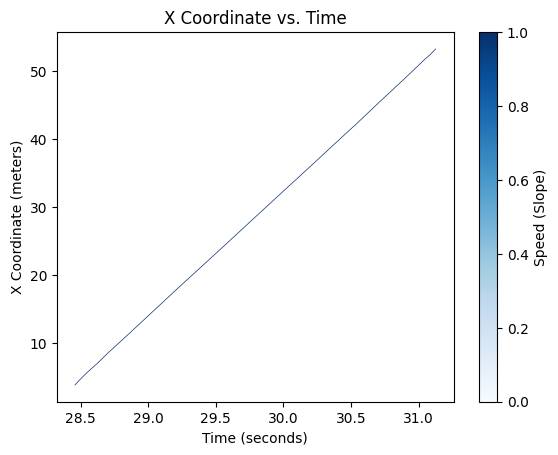

In [32]:
import matplotlib.pyplot as plt
import numpy as np
import pywt
from matplotlib.colors import ListedColormap

def pixel_to_meter(x_pixel, frame_width):
    pixel_to_meter_factor = 58 / frame_width
    return 58 - x_pixel * pixel_to_meter_factor

def frame_to_time(frame, frame_rate):
    return frame / frame_rate

def wavelet_denoise(x_data):
    # Choose a wavelet function (you can experiment with different wavelets)
    wavelet = 'coif1'

    # Decompose the signal into approximation and detail coefficients
    coeffs = pywt.wavedec(x_data, wavelet)

    # Apply VisuShrink thresholding to the detail coefficients
    coeffs_thresholded = [pywt.threshold(c, value=20, mode='hard') for c in coeffs]

    # Reconstruct the denoised signal
    x_denoised = pywt.waverec(coeffs_thresholded, wavelet)

    return x_denoised

def calculate_speed(x_data, time_data):
    # Ensure that x_data and time_data have the same length
    min_length = min(len(x_data), len(time_data))
    x_data = x_data[:min_length]
    time_data = time_data[:min_length]

    # Calculate the speed (slope) of the line using linear regression
    slope, _ = np.polyfit(time_data, x_data, deg=1)
    return slope

def draw_graphs(file_path, selected_ids=None, frame_rate=None):
    data = {}

    with open(file_path, 'r') as f:
        lines = f.readlines()

    for line in lines:
        frame, x_pos, _, id = line.split(',')
        id = int(id)
        frame = int(frame)
        x_pos = float(x_pos)

        if selected_ids is not None and id not in selected_ids:
            continue

        if id not in data:
            data[id] = {'x': [], 'frame': []}

        data[id]['x'].append(x_pos)
        data[id]['frame'].append(frame)

    all_x = [x for values in data.values() for x in values['x']]
    all_frame = [frame for values in data.values() for frame in values['frame']]
    all_time = [frame_to_time(frame, frame_rate) for frame in all_frame]

    overall_speed = calculate_speed(all_x, all_time)

    cmap = ListedColormap(plt.cm.Blues(np.linspace(0, 1, 256)))
    num_lines = len(data)

# Plot graphs for each ID with colors based on the speed (slope)
    for idx, (id, values) in enumerate(data.items()):
        if selected_ids is not None and id not in selected_ids:
            continue

        x_filtered = [x for x, frame in zip(values['x'], values['frame']) if 300 <= x <= 3450]
        frame_filtered = [frame for x, frame in zip(values['x'], values['frame']) if 300 <= x <= 3450]
        time_filtered = [frame_to_time(frame, frame_rate) for frame in frame_filtered]

        if not x_filtered:
            continue

        # Apply wavelet denoising to x_filtered
        x_denoised = wavelet_denoise(x_filtered)

        line_speed = calculate_speed(x_denoised, time_filtered)

        speed_diff = abs(line_speed - overall_speed)
        color = cmap(speed_diff / max(speed_diff, 1e-5))

        x_meters = [pixel_to_meter(x, max(all_x)) for x in x_denoised]

        # Ensure that x_meters and time_filtered have the same length
        min_length = min(len(x_meters), len(time_filtered))
        x_meters = x_meters[:min_length]
        time_filtered = time_filtered[:min_length]

        plt.plot(time_filtered, x_meters, color=color, lw=0.5, label=f'ID: {id}')

    plt.xlabel('Time (seconds)')
    plt.ylabel('X Coordinate (meters)')
    plt.title('X Coordinate vs. Time')

    sm = plt.cm.ScalarMappable(cmap=cmap)
    sm.set_array([])
    cbar = plt.colorbar(sm)
    cbar.set_label('Speed (Slope)')

    plt.show()

# Usage with selected IDs
draw_graphs('positions.txt', selected_ids=[12], frame_rate=fps)


<ipython-input-33-8ae9d9b1c905>:83: RankWarning: Polyfit may be poorly conditioned
  line_speed = calculate_speed(x_denoised, time_filtered)
<ipython-input-33-8ae9d9b1c905>:83: RankWarning: Polyfit may be poorly conditioned
  line_speed = calculate_speed(x_denoised, time_filtered)
<ipython-input-33-8ae9d9b1c905>:103: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


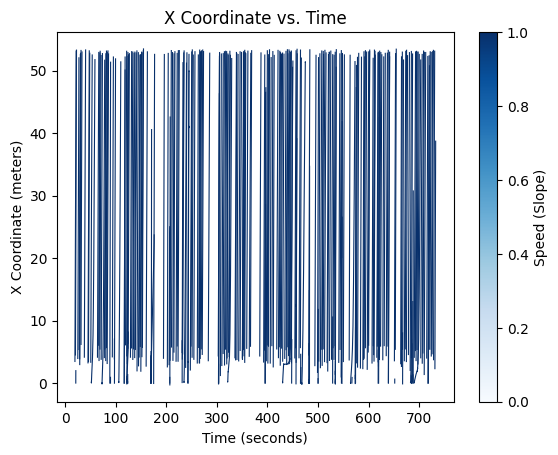

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import pywt
from matplotlib.colors import ListedColormap

def pixel_to_meter(x_pixel, frame_width):
    pixel_to_meter_factor = 58 / frame_width
    return 58 - x_pixel * pixel_to_meter_factor

def frame_to_time(frame, frame_rate):
    return frame / frame_rate

def wavelet_denoise(x_data, wavelet='coif1', threshold=20):
    # Decompose the signal into approximation and detail coefficients
    coeffs = pywt.wavedec(x_data, wavelet)

    # Apply hard thresholding to the detail coefficients
    coeffs_thresholded = [pywt.threshold(c, value=threshold, mode='hard') for c in coeffs]

    # Reconstruct the denoised signal
    x_denoised = pywt.waverec(coeffs_thresholded, wavelet)

    return x_denoised

def calculate_speed(x_data, time_data):
    # Ensure that x_data and time_data have the same length
    min_length = min(len(x_data), len(time_data))
    x_data = x_data[:min_length]
    time_data = time_data[:min_length]

    # Calculate the speed (slope) of the line using linear regression
    slope, _ = np.polyfit(time_data, x_data, deg=1)
    return slope

def draw_graphs(file_path, selected_ids=None, frame_rate=None, wavelet_params=None):
    # Default wavelet parameters
    if wavelet_params is None:
        wavelet_params = {'wavelet': 'coif1', 'threshold': 20}

    data = {}

    with open(file_path, 'r') as f:
        lines = f.readlines()

    for line in lines:
        frame, x_pos, _, id = line.split(',')
        id = int(id)
        frame = int(frame)
        x_pos = float(x_pos)

        if selected_ids is not None and id not in selected_ids:
            continue

        if id not in data:
            data[id] = {'x': [], 'frame': []}

        data[id]['x'].append(x_pos)
        data[id]['frame'].append(frame)

    all_x = [x for values in data.values() for x in values['x']]
    all_frame = [frame for values in data.values() for frame in values['frame']]
    all_time = [frame_to_time(frame, frame_rate) for frame in all_frame]

    overall_speed = calculate_speed(all_x, all_time)

    cmap = ListedColormap(plt.cm.Blues(np.linspace(0, 1, 256)))

    # Plot graphs for each ID with colors based on the speed (slope)
    for idx, (id, values) in enumerate(data.items()):
        if selected_ids is not None and id not in selected_ids:
            continue

        x_filtered = [x for x, frame in zip(values['x'], values['frame']) if 300 <= x <= 3450]
        frame_filtered = [frame for x, frame in zip(values['x'], values['frame']) if 300 <= x <= 3450]
        time_filtered = [frame_to_time(frame, frame_rate) for frame in frame_filtered]

        if not x_filtered:
            continue

        # Apply wavelet denoising to x_filtered
        x_denoised = wavelet_denoise(x_filtered, **wavelet_params)

        line_speed = calculate_speed(x_denoised, time_filtered)

        speed_diff = abs(line_speed - overall_speed)
        color = cmap(speed_diff / max(speed_diff, 1e-5))

        x_meters = [pixel_to_meter(x, max(values['x'])) for x in x_denoised]

        # Ensure that x_meters and time_filtered have the same length
        min_length = min(len(x_meters), len(time_filtered))
        x_meters = x_meters[:min_length]
        time_filtered = time_filtered[:min_length]

        plt.plot(time_filtered, x_meters, color=color, lw=0.8, label=f'ID: {id}')

    plt.xlabel('Time (seconds)')
    plt.ylabel('X Coordinate (meters)')
    plt.title('X Coordinate vs. Time')

    sm = plt.cm.ScalarMappable(cmap=cmap)
    sm.set_array([])
    cbar = plt.colorbar(sm)
    cbar.set_label('Speed (Slope)')

    plt.show()

# Usage with selected IDs and customizable wavelet parameters
draw_graphs('positions.txt', frame_rate=fps, wavelet_params={'wavelet': 'coif1', 'threshold': 20})


<ipython-input-34-1c57b09d313a>:103: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


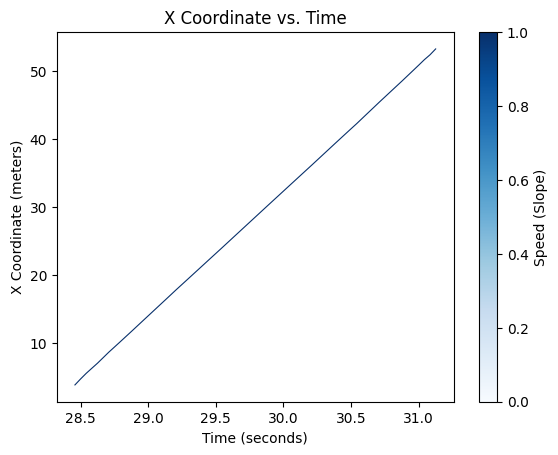

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import pywt
from matplotlib.colors import ListedColormap

def pixel_to_meter(x_pixel, frame_width):
    pixel_to_meter_factor = 58 / frame_width
    return 58 - x_pixel * pixel_to_meter_factor

def frame_to_time(frame, frame_rate):
    return frame / frame_rate

def wavelet_denoise(x_data, wavelet='coif1', threshold=20):
    # Decompose the signal into approximation and detail coefficients
    coeffs = pywt.wavedec(x_data, wavelet)

    # Apply hard thresholding to the detail coefficients
    coeffs_thresholded = [pywt.threshold(c, value=threshold, mode='hard') for c in coeffs]

    # Reconstruct the denoised signal
    x_denoised = pywt.waverec(coeffs_thresholded, wavelet)

    return x_denoised

def calculate_speed(x_data, time_data):
    # Ensure that x_data and time_data have the same length
    min_length = min(len(x_data), len(time_data))
    x_data = x_data[:min_length]
    time_data = time_data[:min_length]

    # Calculate the speed (slope) of the line using linear regression
    slope, _ = np.polyfit(time_data, x_data, deg=1)
    return slope

def draw_graphs(file_path, selected_ids=None, frame_rate=None, wavelet_params=None):
    # Default wavelet parameters
    if wavelet_params is None:
        wavelet_params = {'wavelet': 'coif1', 'threshold': 20}

    data = {}

    with open(file_path, 'r') as f:
        lines = f.readlines()

    for line in lines:
        frame, x_pos, _, id = line.split(',')
        id = int(id)
        frame = int(frame)
        x_pos = float(x_pos)

        if selected_ids is not None and id not in selected_ids:
            continue

        if id not in data:
            data[id] = {'x': [], 'frame': []}

        data[id]['x'].append(x_pos)
        data[id]['frame'].append(frame)

    all_x = [x for values in data.values() for x in values['x']]
    all_frame = [frame for values in data.values() for frame in values['frame']]
    all_time = [frame_to_time(frame, frame_rate) for frame in all_frame]

    overall_speed = calculate_speed(all_x, all_time)

    cmap = ListedColormap(plt.cm.Blues(np.linspace(0, 1, 256)))

    # Plot graphs for each ID with colors based on the speed (slope)
    for idx, (id, values) in enumerate(data.items()):
        if selected_ids is not None and id not in selected_ids:
            continue

        x_filtered = [x for x, frame in zip(values['x'], values['frame']) if 300 <= x <= 3450]
        frame_filtered = [frame for x, frame in zip(values['x'], values['frame']) if 300 <= x <= 3450]
        time_filtered = [frame_to_time(frame, frame_rate) for frame in frame_filtered]

        if not x_filtered:
            continue

        # Apply wavelet denoising to x_filtered
        x_denoised = wavelet_denoise(x_filtered, **wavelet_params)

        line_speed = calculate_speed(x_denoised, time_filtered)

        speed_diff = abs(line_speed - overall_speed)
        color = cmap(speed_diff / max(speed_diff, 1e-5))

        x_meters = [pixel_to_meter(x, max(values['x'])) for x in x_denoised]

        # Ensure that x_meters and time_filtered have the same length
        min_length = min(len(x_meters), len(time_filtered))
        x_meters = x_meters[:min_length]
        time_filtered = time_filtered[:min_length]

        plt.plot(time_filtered, x_meters, color=color, lw=0.8, label=f'ID: {id}')

    plt.xlabel('Time (seconds)')
    plt.ylabel('X Coordinate (meters)')
    plt.title('X Coordinate vs. Time')

    sm = plt.cm.ScalarMappable(cmap=cmap)
    sm.set_array([])
    cbar = plt.colorbar(sm)
    cbar.set_label('Speed (Slope)')

    plt.show()

# Usage with selected IDs and customizable wavelet parameters
draw_graphs('positions.txt', selected_ids=[12], frame_rate=fps, wavelet_params={'wavelet': 'coif1', 'threshold': 20})


<ipython-input-36-039a2ced60b5>:103: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


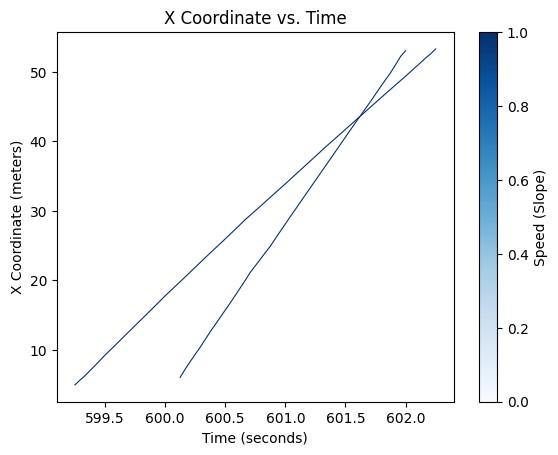

In [36]:
import matplotlib.pyplot as plt
import numpy as np
import pywt
from matplotlib.colors import ListedColormap

def pixel_to_meter(x_pixel, frame_width):
    pixel_to_meter_factor = 58 / frame_width
    return 58 - x_pixel * pixel_to_meter_factor

def frame_to_time(frame, frame_rate):
    return frame / frame_rate

def wavelet_denoise(x_data, wavelet='coif1', threshold=20):
    # Decompose the signal into approximation and detail coefficients
    coeffs = pywt.wavedec(x_data, wavelet)

    # Apply hard thresholding to the detail coefficients
    coeffs_thresholded = [pywt.threshold(c, value=threshold, mode='hard') for c in coeffs]

    # Reconstruct the denoised signal
    x_denoised = pywt.waverec(coeffs_thresholded, wavelet)

    return x_denoised

def calculate_speed(x_data, time_data):
    # Ensure that x_data and time_data have the same length
    min_length = min(len(x_data), len(time_data))
    x_data = x_data[:min_length]
    time_data = time_data[:min_length]

    # Calculate the speed (slope) of the line using linear regression
    slope, _ = np.polyfit(time_data, x_data, deg=1)
    return slope

def draw_graphs(file_path, selected_ids=None, frame_rate=None, wavelet_params=None):
    # Default wavelet parameters
    if wavelet_params is None:
        wavelet_params = {'wavelet': 'coif1', 'threshold': 20}

    data = {}

    with open(file_path, 'r') as f:
        lines = f.readlines()

    for line in lines:
        frame, x_pos, _, id = line.split(',')
        id = int(id)
        frame = int(frame)
        x_pos = float(x_pos)

        if selected_ids is not None and id not in selected_ids:
            continue

        if id not in data:
            data[id] = {'x': [], 'frame': []}

        data[id]['x'].append(x_pos)
        data[id]['frame'].append(frame)

    all_x = [x for values in data.values() for x in values['x']]
    all_frame = [frame for values in data.values() for frame in values['frame']]
    all_time = [frame_to_time(frame, frame_rate) for frame in all_frame]

    overall_speed = calculate_speed(all_x, all_time)

    cmap = ListedColormap(plt.cm.Blues(np.linspace(0, 1, 256)))

    # Plot graphs for each ID with colors based on the speed (slope)
    for idx, (id, values) in enumerate(data.items()):
        if selected_ids is not None and id not in selected_ids:
            continue

        x_filtered = [x for x, frame in zip(values['x'], values['frame']) if 300 <= x <= 3450]
        frame_filtered = [frame for x, frame in zip(values['x'], values['frame']) if 300 <= x <= 3450]
        time_filtered = [frame_to_time(frame, frame_rate) for frame in frame_filtered]

        if not x_filtered:
            continue

        # Apply wavelet denoising to x_filtered
        x_denoised = wavelet_denoise(x_filtered, **wavelet_params)

        line_speed = calculate_speed(x_denoised, time_filtered)

        speed_diff = abs(line_speed - overall_speed)
        color = cmap(speed_diff / max(speed_diff, 1e-5))

        x_meters = [pixel_to_meter(x, max(values['x'])) for x in x_denoised]

        # Ensure that x_meters and time_filtered have the same length
        min_length = min(len(x_meters), len(time_filtered))
        x_meters = x_meters[:min_length]
        time_filtered = time_filtered[:min_length]

        plt.plot(time_filtered, x_meters, color=color, lw=0.8, label=f'ID: {id}')

    plt.xlabel('Time (seconds)')
    plt.ylabel('X Coordinate (meters)')
    plt.title('X Coordinate vs. Time')

    sm = plt.cm.ScalarMappable(cmap=cmap)
    sm.set_array([])
    cbar = plt.colorbar(sm)
    cbar.set_label('Speed (Slope)')

    plt.show()

# Usage with selected IDs and customizable wavelet parameters
draw_graphs('positions.txt', selected_ids=[628,627], frame_rate=fps, wavelet_params={'wavelet': 'coif1', 'threshold': 20})


<ipython-input-35-59de05555296>:103: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


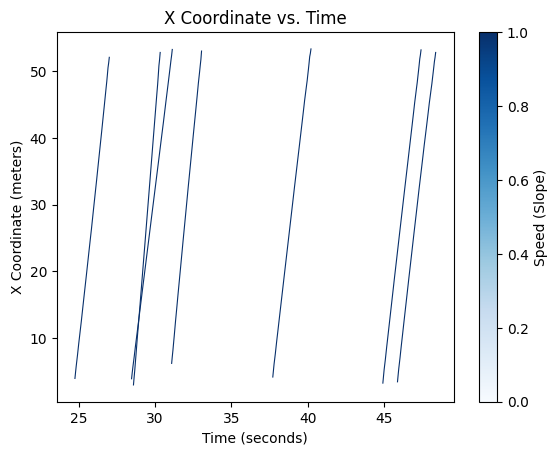

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import pywt
from matplotlib.colors import ListedColormap

def pixel_to_meter(x_pixel, frame_width):
    pixel_to_meter_factor = 58 / frame_width
    return 58 - x_pixel * pixel_to_meter_factor

def frame_to_time(frame, frame_rate):
    return frame / frame_rate

def wavelet_denoise(x_data, wavelet='coif1', threshold=20):
    # Decompose the signal into approximation and detail coefficients
    coeffs = pywt.wavedec(x_data, wavelet)

    # Apply hard thresholding to the detail coefficients
    coeffs_thresholded = [pywt.threshold(c, value=threshold, mode='hard') for c in coeffs]

    # Reconstruct the denoised signal
    x_denoised = pywt.waverec(coeffs_thresholded, wavelet)

    return x_denoised

def calculate_speed(x_data, time_data):
    # Ensure that x_data and time_data have the same length
    min_length = min(len(x_data), len(time_data))
    x_data = x_data[:min_length]
    time_data = time_data[:min_length]

    # Calculate the speed (slope) of the line using linear regression
    slope, _ = np.polyfit(time_data, x_data, deg=1)
    return slope

def draw_graphs(file_path, selected_ids=None, frame_rate=None, wavelet_params=None):
    # Default wavelet parameters
    if wavelet_params is None:
        wavelet_params = {'wavelet': 'coif1', 'threshold': 20}

    data = {}

    with open(file_path, 'r') as f:
        lines = f.readlines()

    for line in lines:
        frame, x_pos, _, id = line.split(',')
        id = int(id)
        frame = int(frame)
        x_pos = float(x_pos)

        if selected_ids is not None and id not in selected_ids:
            continue

        if id not in data:
            data[id] = {'x': [], 'frame': []}

        data[id]['x'].append(x_pos)
        data[id]['frame'].append(frame)

    all_x = [x for values in data.values() for x in values['x']]
    all_frame = [frame for values in data.values() for frame in values['frame']]
    all_time = [frame_to_time(frame, frame_rate) for frame in all_frame]

    overall_speed = calculate_speed(all_x, all_time)

    cmap = ListedColormap(plt.cm.Blues(np.linspace(0, 1, 256)))

    # Plot graphs for each ID with colors based on the speed (slope)
    for idx, (id, values) in enumerate(data.items()):
        if selected_ids is not None and id not in selected_ids:
            continue

        x_filtered = [x for x, frame in zip(values['x'], values['frame']) if 300 <= x <= 3450]
        frame_filtered = [frame for x, frame in zip(values['x'], values['frame']) if 300 <= x <= 3450]
        time_filtered = [frame_to_time(frame, frame_rate) for frame in frame_filtered]

        if not x_filtered:
            continue

        # Apply wavelet denoising to x_filtered
        x_denoised = wavelet_denoise(x_filtered, **wavelet_params)

        line_speed = calculate_speed(x_denoised, time_filtered)

        speed_diff = abs(line_speed - overall_speed)
        color = cmap(speed_diff / max(speed_diff, 1e-5))

        x_meters = [pixel_to_meter(x, max(values['x'])) for x in x_denoised]

        # Ensure that x_meters and time_filtered have the same length
        min_length = min(len(x_meters), len(time_filtered))
        x_meters = x_meters[:min_length]
        time_filtered = time_filtered[:min_length]

        plt.plot(time_filtered, x_meters, color=color, lw=0.8, label=f'ID: {id}')

    plt.xlabel('Time (seconds)')
    plt.ylabel('X Coordinate (meters)')
    plt.title('X Coordinate vs. Time')

    sm = plt.cm.ScalarMappable(cmap=cmap)
    sm.set_array([])
    cbar = plt.colorbar(sm)
    cbar.set_label('Speed (Slope)')

    plt.show()

# Usage with selected IDs and customizable wavelet parameters
draw_graphs('positions.txt', selected_ids=range(7, 31), frame_rate=fps, wavelet_params={'wavelet': 'coif1', 'threshold': 20})
